# Simulating simple D/D/1 queues

In [27]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 100
ARRIVAL_RATE = 1
EXECUTION_RATE = 50

## An example arrival time distribution

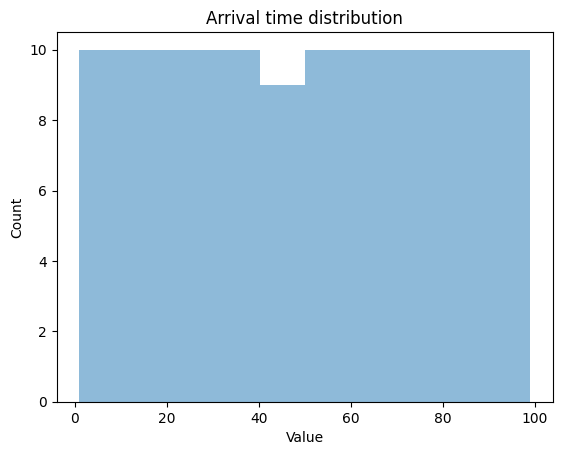

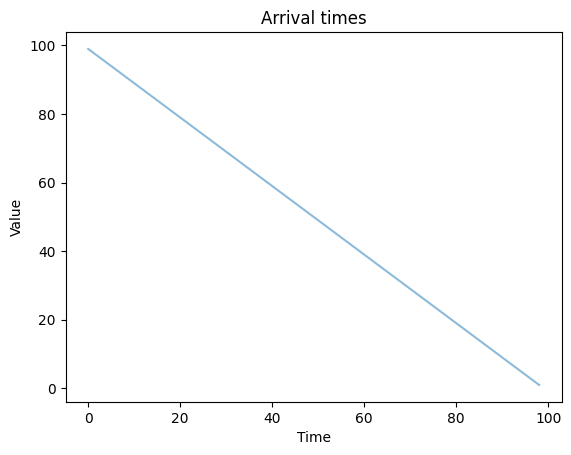

Mean arrival time: 50.0


In [28]:
inter_arrival_time = np.array([100-x for x in range(1, 100)])

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

plt.title("Arrival times")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')

## Queue length over time

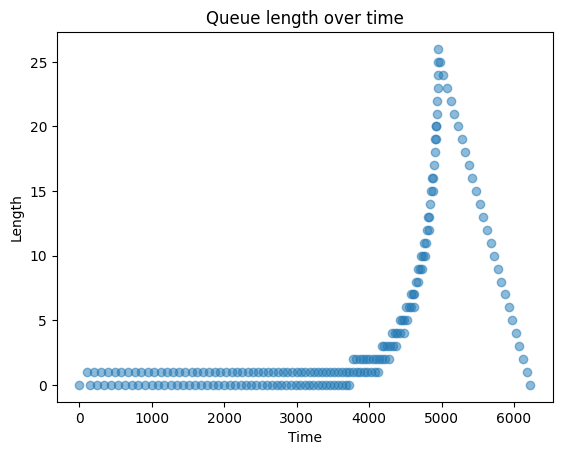

Mean queue length: 1717.2361809045226


In [29]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_RATE))
queue.process()
queue_lenght = np.array(queue.length)

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.scatter(*zip(*queue_lenght), alpha=0.5)
plt.show()

print(f'Mean queue length: {queue_lenght.mean()}')


## Departure time and distribution

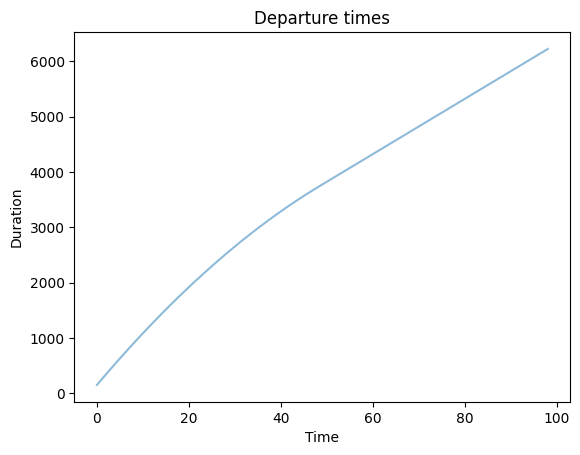

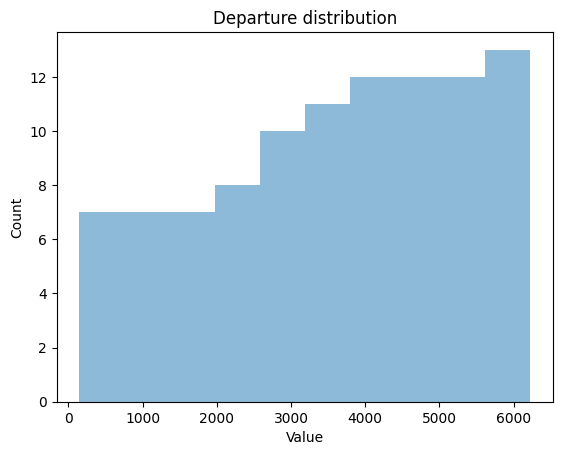

In [30]:
plt.title("Departure times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

## Wait time and distribution

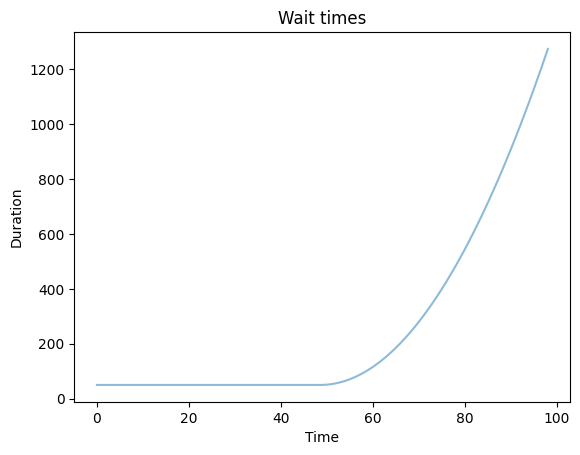

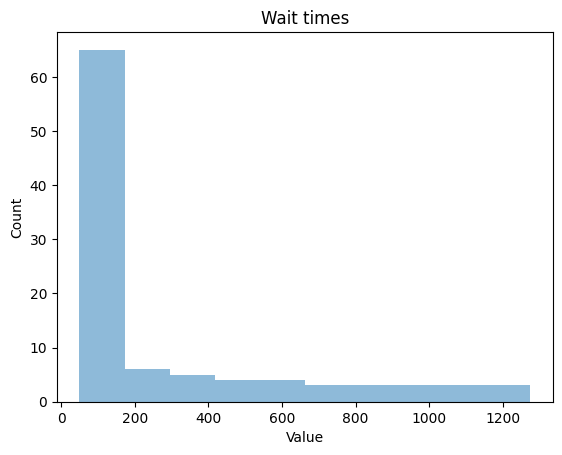

In [31]:
plt.title("Wait times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()